## Training a decision tree

`sklearn.datasets.load_digits` is a dataset of 8 by 8 images of numbers.
In this assignment, you will train a decision tree classifier with sklearn and tune the parameter to get better accuracy.

In [3]:
# Run the following code to get your training data and test data
seed = 20190327
import sklearn.datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
Load_digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(Load_digits.data,
                                                    Load_digits.target, 
                                                    test_size=0.2, 
                                                    random_state=seed)

D:\anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


### In this assignment, you are required to:

1. Train a model and test its accuracy

    ***Note***: Use `random_state=seed` as an argument of the model so as to get consistent results.
    
2. Tune the parameter to get better performance 

 ***Note***: In order to get full marks, you need to show your work how you choose the best perameters, rather than just showing what the best parameter is.

In [4]:
# 1. import model from sklearn
from sklearn.datasets import load_digits

import graphviz
from IPython.display import Image

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [5]:
Load_digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

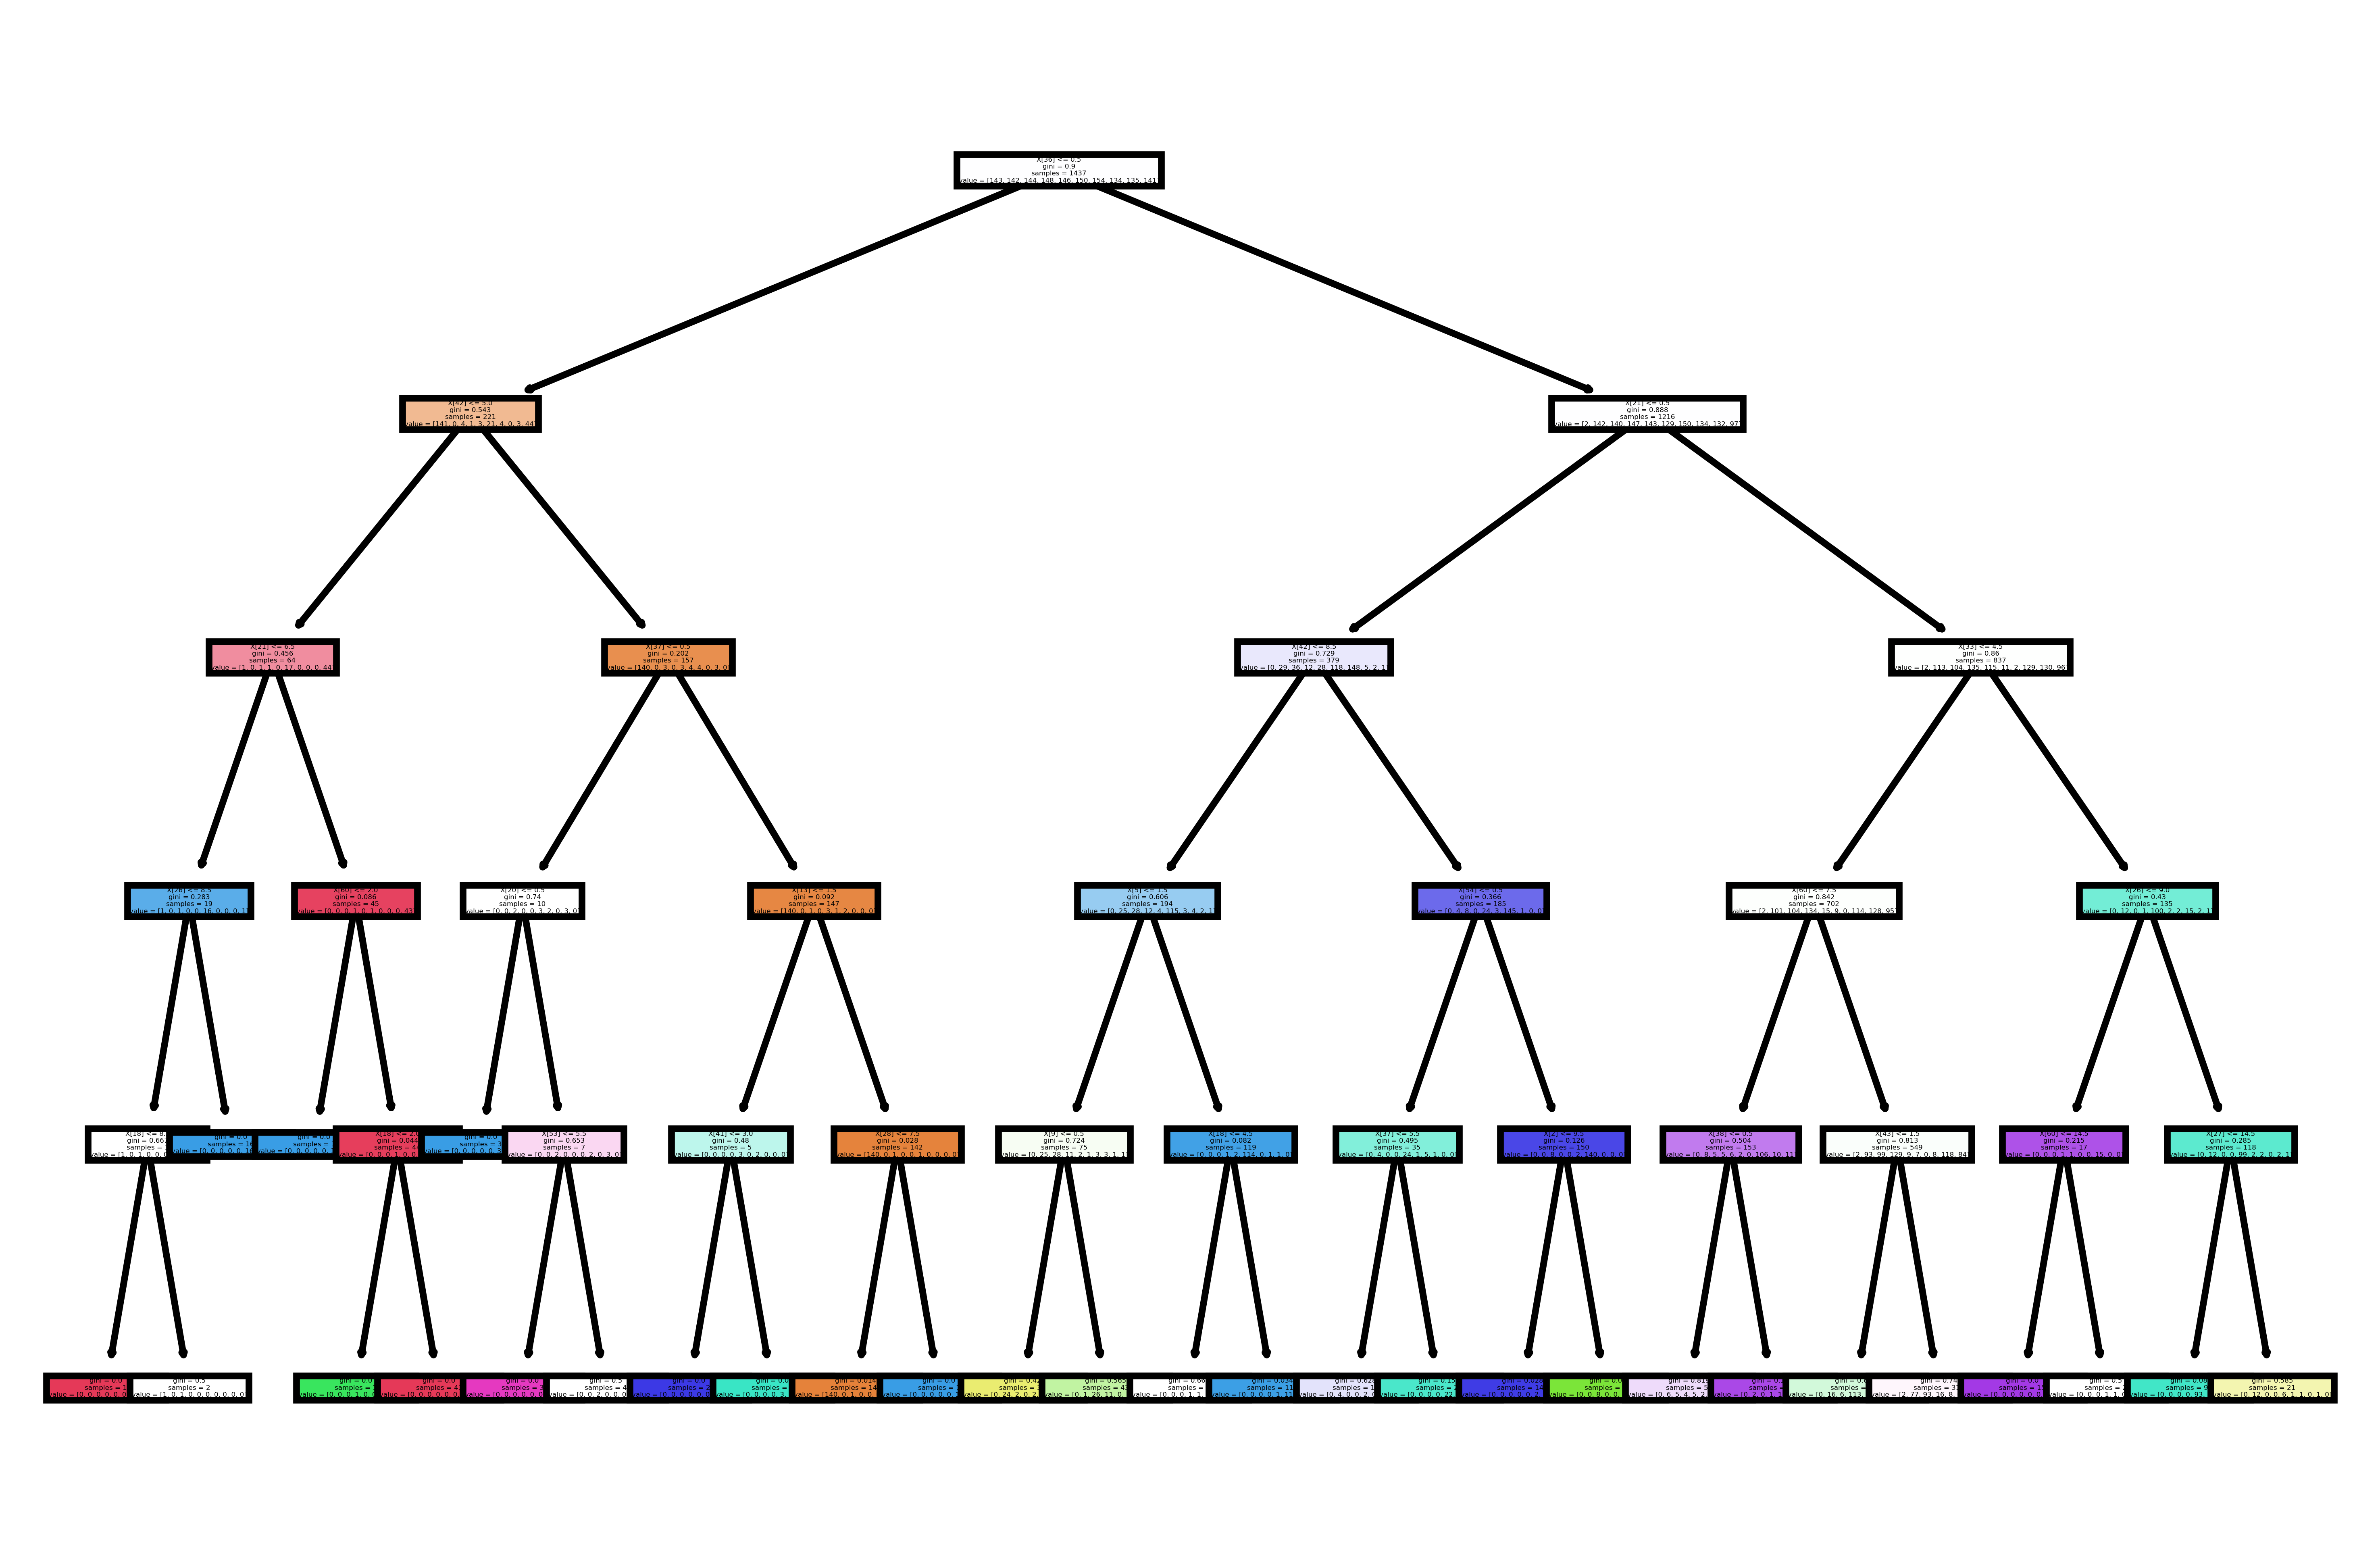

In [6]:
# 2. train you model with X_train and y_train

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5) 
clf = clf.fit(X_train, y_train)

fig, axes = plt.subplots(dpi=1200)

tree.plot_tree(clf,
               filled = True);

In [7]:
# 3. test your performance on X_test and y_test

y_predict = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score 
accuracy_score(y_predict, y_test)

# You can use accuracy_score to get accuracy of you model. You may also compute the score manually.
# Your code here

0.6805555555555556

There are several parameters to tune in a decision tree model, (e.g., `max_depth`, `max_features`, `max_leaf_nodes`, `min_samples_leaf`, `min_samples_split`). Try to tune your model by choosing the values for 1 ~ 3 parameters using cross validation. For example:

In [34]:
# 4.1 You may choose more parameters to tune
# test max_features

def run_cross_validation_on_trees_features(X, y, tree_depths, tree_features, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        for feature in tree_features:
            tree_model = DecisionTreeClassifier(max_features=feature,max_depth=depth)
            cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
            cv_scores_list.append(cv_scores)
            cv_scores_mean.append(cv_scores.mean())
            cv_scores_std.append(cv_scores.std())
            accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# fitting trees of depth 1 to 5
sm_tree_depths = range(1,9) #prevent overfitting
sm_tree_features = range(1,51)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees_features(X_train, y_train,sm_tree_depths, sm_tree_features)


In [35]:
idx_max = sm_cv_scores_mean.argmax()
dp = int(idx_max/50)
ft = idx_max % 50

sm_best_tree_depth = sm_tree_depths[dp]
sm_best_tree_feature = sm_tree_features[ft]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The  depth-{} tree with -{} features achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, sm_best_tree_feature, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The  depth-8 tree with -37 features achieves the best mean cross-validation accuracy 84.892 +/- 1.47127% on training dataset


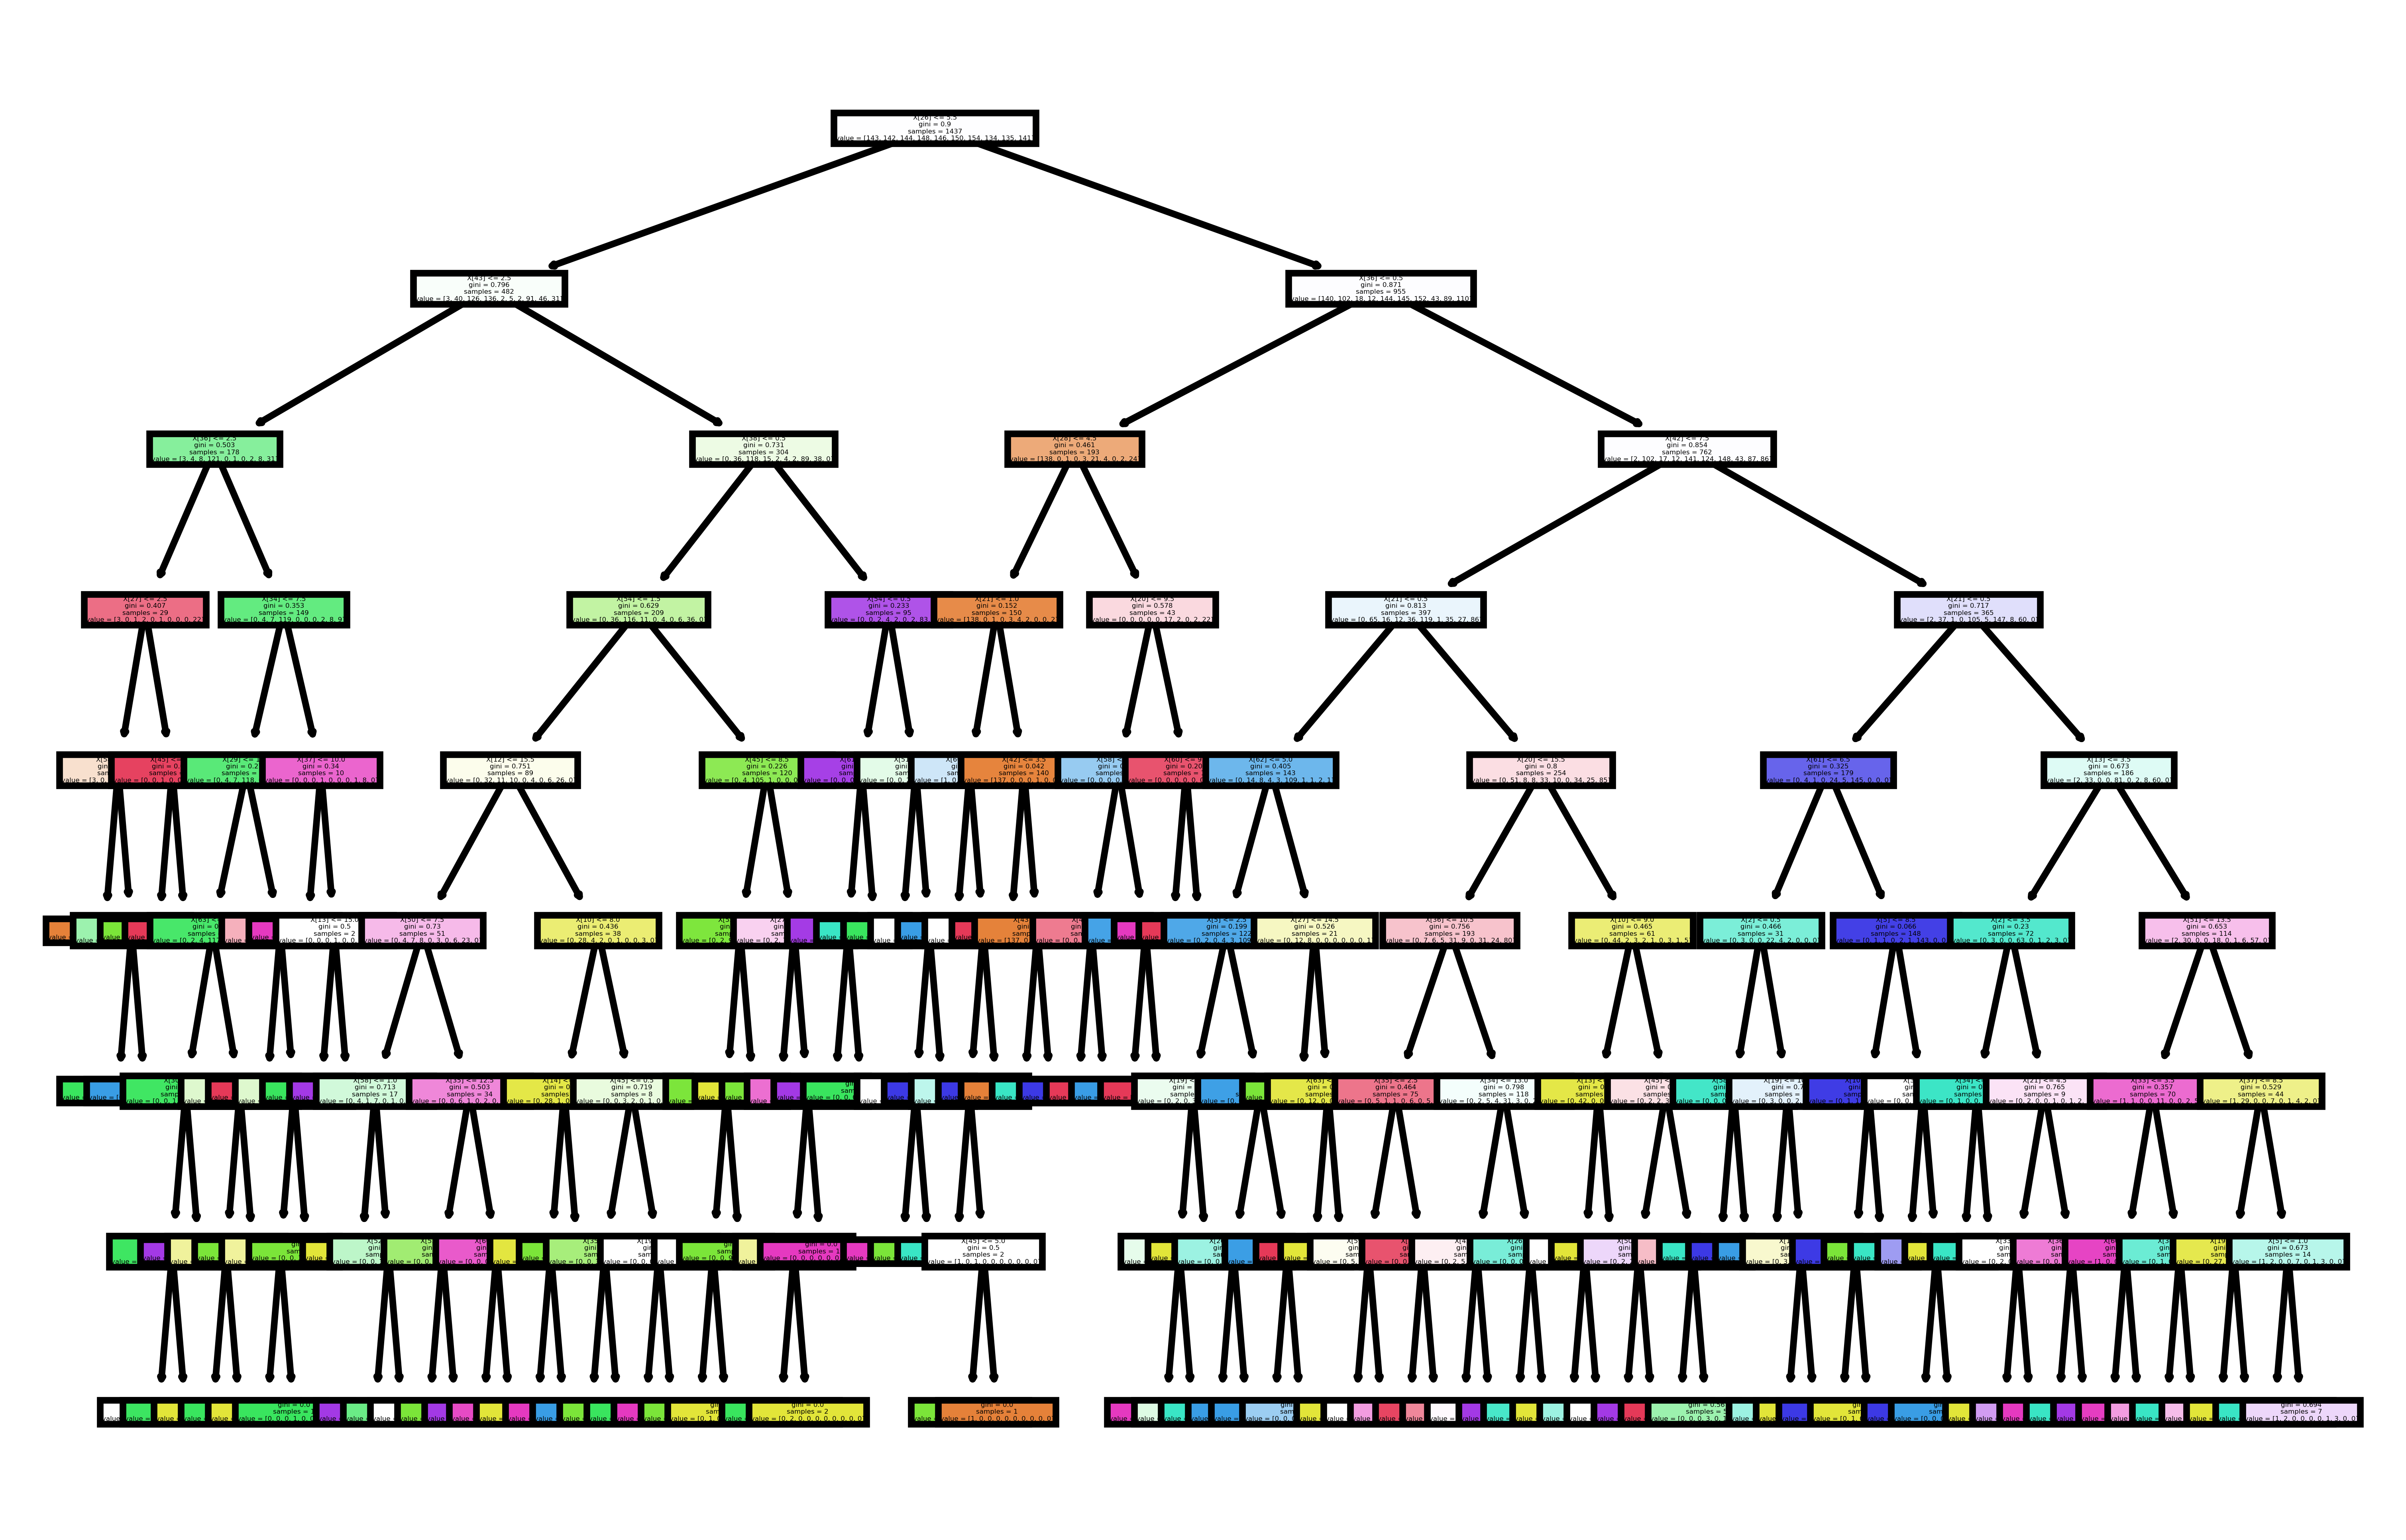

In [38]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=sm_best_tree_depth,max_features=sm_best_tree_feature) #prevent overfitting
clf = clf.fit(X_train, y_train)

fig, axes = plt.subplots(dpi=1200)

tree.plot_tree(clf,
               filled = True);

In [39]:
y_predict = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score 
accuracy_score(y_predict, y_test)


0.8388888888888889